In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime as dt
import datetime
import csv
import math
import scipy.stats as stats

In [3]:
# all data for each individual SCK: SCK1[n=26], SCK2[n=22], SCK2[n=21]
SCK1 = pd.read_csv('CO_ALL_SCK1.csv')
SCK2 = pd.read_csv('CO_ALL_SCK2.csv')
SCK3 = pd.read_csv('CO_ALL_SCK3.csv')

In [4]:
# the lowest 10% of CO each day overlaid for all days
SCK1_tenCO = pd.read_csv('CO_ten_SCK1.csv')
SCK2_tenCO = pd.read_csv('CO_ten_SCK2.csv')
SCK3_tenCO = pd.read_csv('CO_ten_SCK3.csv')

In [5]:
# the highest 10% of NO2 each day overlaid for all days
SCK1_tenNO2 = pd.read_csv('NO2_ten_SCK1.csv')
SCK2_tenNO2 = pd.read_csv('NO2_ten_SCK2.csv')
SCK3_tenNO2 = pd.read_csv('NO2_ten_SCK3.csv')

In [6]:
# all data when the SCKs were used with cases vs no cases
SCK2_cases = pd.read_csv('ALL_SCK2_cases.csv')
SCK2_nocases = pd.read_csv('ALL_SCK2_nocases.csv')
SCK3_cases = pd.read_csv('ALL_SCK3_cases.csv')
SCK3_nocases = pd.read_csv('ALL_SCK3_nocases.csv')

In [7]:
# extract individial variables for statistical comparison
# ALL_SCK1_CO = SCK1[]
# ALL_SCK2_CO = SCK2['SCK2_CO']
# ALL_SCK3_CO = SCK3['SCK3_CO']

In [8]:
# comparing the CO for all 3 SCKs. 
#stats.f_oneway(ALL_SCK1_CO,ALL_SCK2_CO,ALL_SCK3_CO)

In [9]:
# post-hoc test: separate t-tests for each pair of groups
namelist = ('SCK1_CO','SCK2_CO','SCK3_CO',
           'SCK1_NO2','SCK2_NO2','SCK3_NO2',
            'SCK1_TC','SCK2_TC','SCK3_TC',
           'FS_TF','FS_WS','FS_UP')
datalist = ([SCK1['SCK1_CO'],SCK2['SCK2_CO'],SCK3['SCK3_CO'],
            SCK1['SCK1_NO2'],SCK2['SCK2_NO2'],SCK3['SCK3_NO2'],
            SCK1['SCK1_TC'],SCK2['SCK2_TC'],SCK3['SCK3_TC'],
            SCK1['FS_TF'],SCK1['FS_WS'],SCK2['FS_UP']])
for i in range(12):
    for j in range(12):
        print namelist[i],'|',namelist[j], '  ',stats.ttest_ind(datalist[i],datalist[j])
        print ''

SCK1_CO | SCK1_CO    (0.0, 1.0)

SCK1_CO | SCK2_CO    (159.78748662396205, 0.0)

SCK1_CO | SCK3_CO    (225.47052673764051, 0.0)

SCK1_CO | SCK1_NO2    (424.65190264859427, 0.0)

SCK1_CO | SCK2_NO2    (428.10378088767391, 0.0)

SCK1_CO | SCK3_NO2    (417.15866736528295, 0.0)

SCK1_CO | SCK1_TC    (454.3247674982112, 0.0)

SCK1_CO | SCK2_TC    (434.46408514980379, 0.0)

SCK1_CO | SCK3_TC    (425.27264829058834, 0.0)

SCK1_CO | FS_TF    (424.45235174720551, 0.0)

SCK1_CO | FS_WS    (461.83927978972753, 0.0)

SCK1_CO | FS_UP    (110.8192017367119, 0.0)

SCK2_CO | SCK1_CO    (-159.78748662396205, 0.0)

SCK2_CO | SCK2_CO    (0.0, 1.0)

SCK2_CO | SCK3_CO    (99.760094010992049, 0.0)

SCK2_CO | SCK1_NO2    (421.12851246546137, 0.0)

SCK2_CO | SCK2_NO2    (465.38142930861676, 0.0)

SCK2_CO | SCK3_NO2    (448.7689156371232, 0.0)

SCK2_CO | SCK1_TC    (499.82735092708759, 0.0)

SCK2_CO | SCK2_TC    (478.2340624262572, 0.0)

SCK2_CO | SCK3_TC    (467.01607426417371, 0.0)

SCK2_CO | FS_TF    (443.7

In [11]:
def norm(var):
    norm = []
    for i,item in enumerate(var):
        data = (var[i]-np.min(var))/(np.max(var)-np.min(var))
        norm = np.append(data,norm)
    return norm[::-1]

In [12]:
# post-hoc test: separate t-tests for each pair of groups
namelist = ('SCK2_CO_cases','SCK2_CO_nocases',
           'SCK2_NO2_cases','SCK2_NO2_nocases',
           'SCK2_TC_cases','SCK2_TC_nocases',
           'SCK2_RH_cases','SCK2_RH_nocases')
datalist = ([norm(SCK2_cases['SCK2_CO']),norm(SCK2_nocases['SCK2_CO']),
             norm(SCK2_cases['SCK2_NO2']),norm(SCK2_nocases['SCK2_NO2']),
            norm(SCK2_cases['SCK2_TC']),norm(SCK2_nocases['SCK2_TC']),
            norm(SCK2_cases['SCK2_RH']),norm(SCK2_nocases['SCK2_RH'])])
for i in range(8):
    for j in range(8):
        print namelist[i],'|',namelist[j], '  ', stats.ttest_ind(datalist[i],datalist[j])
        print ''

SCK2_CO_cases | SCK2_CO_cases    (0.0, 1.0)

SCK2_CO_cases | SCK2_CO_nocases    (133.34553395946222, 0.0)

SCK2_CO_cases | SCK2_NO2_cases    (40.77753323986574, 0.0)

SCK2_CO_cases | SCK2_NO2_nocases    (120.76083119512649, 0.0)

SCK2_CO_cases | SCK2_TC_cases    (28.423043888657581, 1.9447712244610301e-169)

SCK2_CO_cases | SCK2_TC_nocases    (26.921832541622933, 6.4909877354031571e-156)

SCK2_CO_cases | SCK2_RH_cases    (29.426383458001371, 7.1989472561725462e-181)

SCK2_CO_cases | SCK2_RH_nocases    (63.594640712288751, 0.0)

SCK2_CO_nocases | SCK2_CO_cases    (-133.34553395946222, 0.0)

SCK2_CO_nocases | SCK2_CO_nocases    (0.0, 1.0)

SCK2_CO_nocases | SCK2_NO2_cases    (-20.042060850094185, 3.4478454769597874e-88)

SCK2_CO_nocases | SCK2_NO2_nocases    (26.398872704531787, 3.4525630394436094e-151)

SCK2_CO_nocases | SCK2_TC_cases    (-46.887649494188778, 0.0)

SCK2_CO_nocases | SCK2_TC_nocases    (-95.702529198484399, 0.0)

SCK2_CO_nocases | SCK2_RH_cases    (-31.592941765002969, 4

In [13]:
# post-hoc test: separate t-tests for each pair of groups
namelist = ('SCK3_CO_cases','SCK3_CO_nocases',
           'SCK3_NO2_cases','SCK3_NO2_nocases',
           'SCK3_TC_cases','SCK3_TC_nocases',
           'SCK3_RH_cases','SCK3_RH_nocases')
datalist = ([norm(SCK3_cases['SCK3_CO']),norm(SCK3_nocases['SCK3_CO']),
             norm(SCK3_cases['SCK3_NO2']),norm(SCK3_nocases['SCK3_NO2']),
            norm(SCK3_cases['SCK3_TC']),norm(SCK3_nocases['SCK3_TC']),
            norm(SCK3_cases['SCK3_RH']),norm(SCK3_nocases['SCK3_RH'])])
for i in range(8):
    for j in range(8):
        print namelist[i],'|',namelist[j], '  ', stats.ttest_ind(datalist[i],datalist[j])
        print ''

SCK3_CO_cases | SCK3_CO_cases    (0.0, 1.0)

SCK3_CO_cases | SCK3_CO_nocases    (148.8039340089484, 0.0)

SCK3_CO_cases | SCK3_NO2_cases    (65.267949343001774, 0.0)

SCK3_CO_cases | SCK3_NO2_nocases    (138.7772743557729, 0.0)

SCK3_CO_cases | SCK3_TC_cases    (78.758618377299996, 0.0)

SCK3_CO_cases | SCK3_TC_nocases    (45.810357043288128, 0.0)

SCK3_CO_cases | SCK3_RH_cases    (60.434692669989722, 0.0)

SCK3_CO_cases | SCK3_RH_nocases    (92.918144767566261, 0.0)

SCK3_CO_nocases | SCK3_CO_cases    (-148.8039340089484, 0.0)

SCK3_CO_nocases | SCK3_CO_nocases    (0.0, 1.0)

SCK3_CO_nocases | SCK3_NO2_cases    (-9.9546233024529087, 2.8645609074380377e-23)

SCK3_CO_nocases | SCK3_NO2_nocases    (18.282643749021044, 4.3829571890447124e-74)

SCK3_CO_nocases | SCK3_TC_cases    (-12.9630042897313, 3.2517273479899516e-38)

SCK3_CO_nocases | SCK3_TC_nocases    (-136.36236157803387, 0.0)

SCK3_CO_nocases | SCK3_RH_cases    (-58.486100462486569, 0.0)

SCK3_CO_nocases | SCK3_RH_nocases    (-13

In [14]:
import matplotlib.mlab as mlab

16285 857.499901457


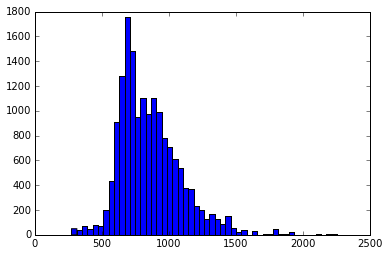

In [15]:
n, bins, patches = plt.hist(SCK1['SCK1_CO'], 50, facecolor='blue')
print len(SCK1['SCK1_CO']), np.mean(SCK1['SCK1_CO'])

In [16]:
normSCK1 = norm(SCK1['SCK1_CO'])

16285 0.29455023445


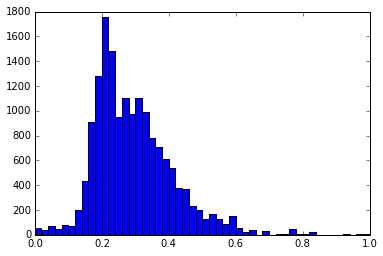

In [17]:
n, bins, patches = plt.hist(normSCK1, 50, facecolor='blue')
print len(normSCK1), np.mean(normSCK1)

14870 513.345977189


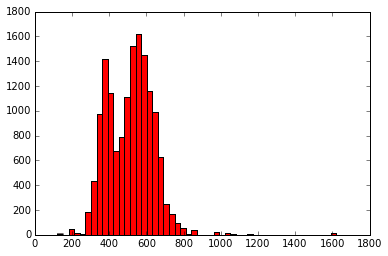

In [18]:
n, bins, patches = plt.hist(SCK2['SCK2_CO'], 50, facecolor='red')
print len(SCK2['SCK2_CO']), np.mean(SCK2['SCK2_CO'])

In [19]:
normSCK2 = norm(SCK2['SCK2_CO'])

14870 0.261195877027


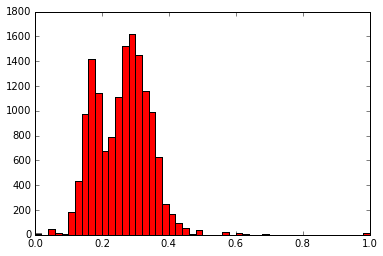

In [20]:
n, bins, patches = plt.hist(normSCK2, 50, facecolor='red')
print len(normSCK2), np.mean(normSCK2)

14337 375.573569673


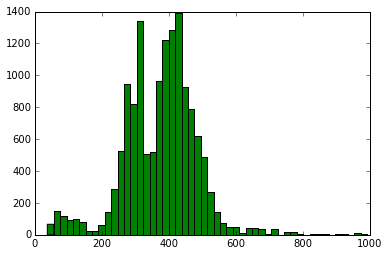

In [21]:
n, bins, patches = plt.hist(SCK3['SCK3_CO'], 50, normed=0, facecolor='green')
print len(SCK3['SCK3_CO']), np.mean(SCK3['SCK3_CO'])

In [22]:
normSCK3 = norm(SCK3['SCK3_CO'])

14337 0.354065513542


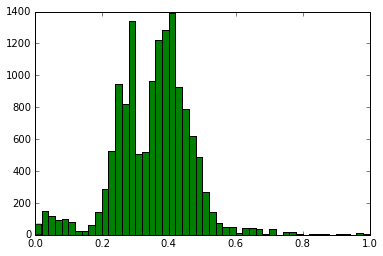

In [23]:
n, bins, patches = plt.hist(normSCK3, 50, facecolor='green')
print len(normSCK3), np.mean(normSCK3)

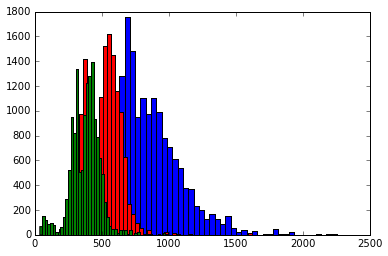

In [24]:
n, bins, patches = plt.hist(SCK1['SCK1_CO'], 50, normed=0, facecolor='blue')
n, bins, patches = plt.hist(SCK2['SCK2_CO'], 50, normed=0, facecolor='red')
n, bins, patches = plt.hist(SCK3['SCK3_CO'], 50, normed=0, facecolor='green')

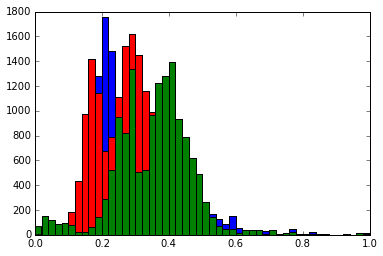

In [25]:
n, bins, patches = plt.hist(normSCK1, 50, facecolor='blue')
n, bins, patches = plt.hist(normSCK2, 50, facecolor='red')
n, bins, patches = plt.hist(normSCK3, 50, facecolor='green')

In [26]:
import seaborn

:0: FutureWarning: IPython widgets are experimental and may change in the future.


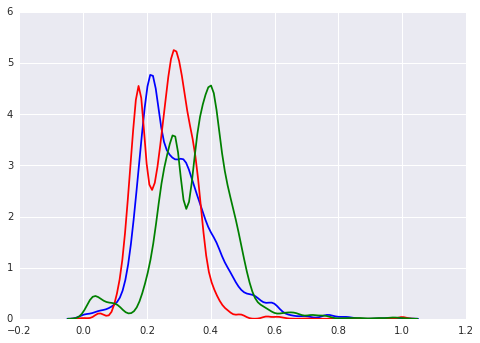

In [27]:
seaborn.kdeplot(normSCK1,color='b')
seaborn.kdeplot(normSCK2,color='r')
seaborn.kdeplot(normSCK3,color='g')

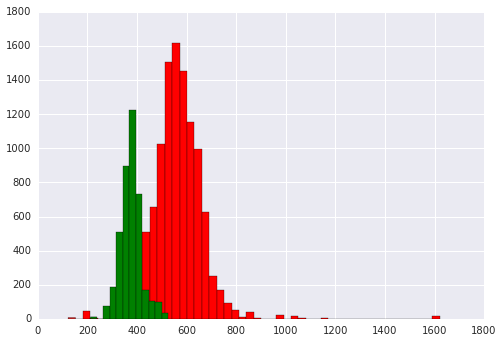

In [28]:
n, bins, patches = plt.hist(SCK2_nocases['SCK2_CO'], 50, normed=0, facecolor='red')
n, bins, patches = plt.hist(SCK2_cases['SCK2_CO'], 12, normed=0, facecolor='green')

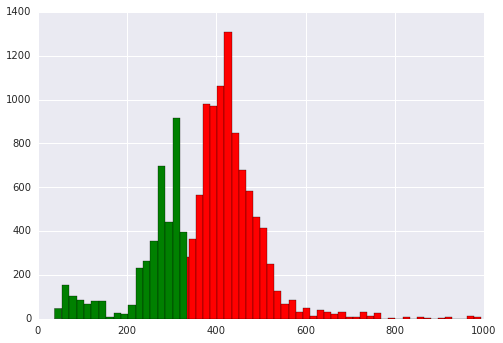

In [29]:
n, bins, patches = plt.hist(SCK3_nocases['SCK3_CO'], 50, normed=0, facecolor='red')
n, bins, patches = plt.hist(SCK3_cases['SCK3_CO'], 18, normed=0, facecolor='green')

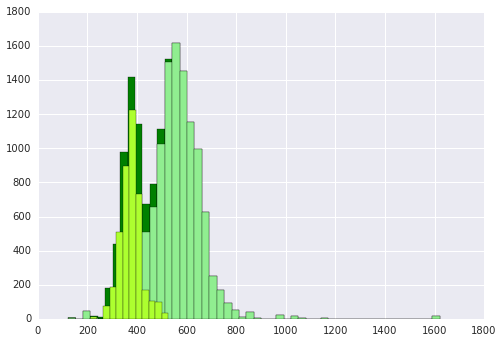

In [30]:
n, bins, patches = plt.hist(SCK2['SCK2_CO'], 50, normed=0, facecolor='green')
n, bins, patches = plt.hist(SCK2_nocases['SCK2_CO'], 50, normed=0, facecolor='lightgreen')
n, bins, patches = plt.hist(SCK2_cases['SCK2_CO'], 12, normed=0, facecolor='greenyellow')

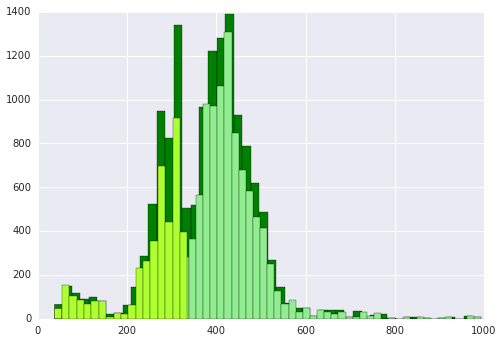

In [31]:
n, bins, patches = plt.hist(SCK3['SCK3_CO'], 50, normed=0, facecolor='green')
n, bins, patches = plt.hist(SCK3_nocases['SCK3_CO'], 50, normed=0, facecolor='lightgreen')
n, bins, patches = plt.hist(SCK3_cases['SCK3_CO'], 18, normed=0, facecolor='greenyellow')

In [32]:
len(SCK2['SCK2_CO']), len(normSCK2)

(14870, 14870)

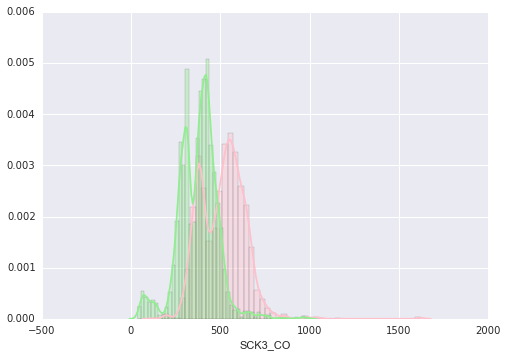

In [33]:
seaborn.distplot(SCK2['SCK2_CO'],color='pink',label='SCK2 nocase')
seaborn.distplot(SCK3['SCK3_CO'],color='lightgreen',label='SCK2 nocase')

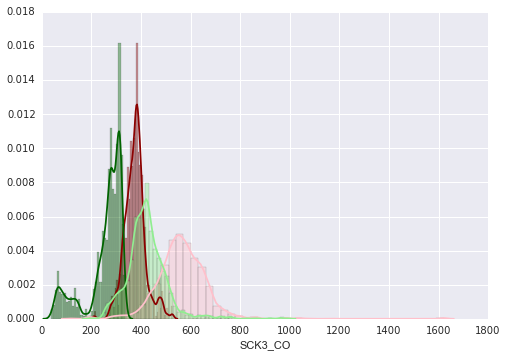

In [34]:
seaborn.distplot(SCK2_cases['SCK2_CO'],color='darkred',label='SCK2 nocase')
seaborn.distplot(SCK2_nocases['SCK2_CO'],color='pink',label='SCK3 nocase')
seaborn.distplot(SCK3_cases['SCK3_CO'],color='darkgreen',label='SCK2 case')
seaborn.distplot(SCK3_nocases['SCK3_CO'],color='lightgreen',label='SCK3 case')

In [35]:
# post-hoc test: separate t-tests for each pair of groups
namelist = ('normSCK1_CO','normSCK2_CO','normSCK3_CO',
           'normSCK1_NO2','normSCK2_NO2','normSCK3_NO2',
            'normSCK1_TC','normSCK2_TC','normSCK3_TC',
           'n1FS_TF','n1FS_WS','n1FS_UP',
           'n2FS_TF','n2FS_WS','n2FS_UP',
           'n3FS_TF','n3FS_WS','n3FS_UP',)
datalist = ([normSCK1,normSCK2,normSCK3,
            norm(SCK1['SCK1_NO2']),norm(SCK2['SCK2_NO2']),norm(SCK3['SCK3_NO2']),
            norm(SCK1['SCK1_TC']),norm(SCK2['SCK2_TC']),norm(SCK3['SCK3_TC']),
            norm(SCK1['FS_TF']),norm(SCK1['FS_WS']),norm(SCK1['FS_UP']),
            norm(SCK2['FS_TF']),norm(SCK2['FS_WS']),norm(SCK2['FS_UP']),
            norm(SCK3['FS_TF']),norm(SCK3['FS_WS']),norm(SCK3['FS_UP'])])
for i in range(18):
    for j in range(18):
        print namelist[i],'|',namelist[j], '  ',stats.ttest_ind(datalist[i],datalist[j])
        print ''

normSCK1_CO | normSCK1_CO    (0.0, 1.0)

normSCK1_CO | normSCK2_CO    (28.554294386068719, 4.7654218032165773e-177)

normSCK1_CO | normSCK3_CO    (-44.429063633413882, 0.0)

normSCK1_CO | normSCK1_NO2    (193.37724768828093, 0.0)

normSCK1_CO | normSCK2_NO2    (33.360547420033292, 8.5845994537262124e-240)

normSCK1_CO | normSCK3_NO2    (53.721431350708933, 0.0)

normSCK1_CO | normSCK1_TC    (-113.42767656650179, 0.0)

normSCK1_CO | normSCK2_TC    (-125.8918194428296, 0.0)

normSCK1_CO | normSCK3_TC    (-54.922898844512019, 0.0)

normSCK1_CO | n1FS_TF    (-131.92082099191239, 0.0)

normSCK1_CO | n1FS_WS    (-89.771658805667442, 0.0)

normSCK1_CO | n1FS_UP    (nan, nan)

normSCK1_CO | n2FS_TF    (-148.83613800002468, 0.0)

normSCK1_CO | n2FS_WS    (-100.90712285074616, 0.0)

normSCK1_CO | n2FS_UP    (-142.54613599730664, 0.0)

normSCK1_CO | n3FS_TF    (-152.43766333320605, 0.0)

normSCK1_CO | n3FS_WS    (-108.23590724846829, 0.0)

normSCK1_CO | n3FS_UP    (-138.72981367185616, 0.0)

norm

In [36]:
def mean(var):
    print 'mean', np.mean(var), '  std', np.std(var)

In [43]:
mean(SCK2_cases['SCK2_CO'])
mean(SCK3_cases['SCK3_CO'])
mean(SCK2_nocases['SCK2_CO'])
mean(SCK3_nocases['SCK3_CO'])

mean 376.224292109   std 42.4815231951
mean 254.575863722   std 75.6770502613
mean 564.323873026   std 105.399185342
mean 422.883238343   std 82.2902653513


In [44]:
mean(SCK2_cases['SCK2_NO2'])
mean(SCK3_cases['SCK3_NO2'])
mean(SCK2_nocases['SCK2_NO2'])
mean(SCK3_nocases['SCK3_NO2'])

mean 32.1200897238   std 11.9726264423
mean 25.1048772394   std 12.1640536951
mean 36.3058884531   std 10.3343985892
mean 45.1316613945   std 20.3489524012


In [45]:
mean(SCK2_cases['SCK2_TC'])
mean(SCK3_cases['SCK3_TC'])
mean(SCK2_nocases['SCK2_TC'])
mean(SCK3_nocases['SCK3_TC'])

mean 25.7543315136   std 1.86799527507
mean 30.7827781638   std 3.48339416177
mean 22.9924446494   std 2.47932759931
mean 24.5339858349   std 2.48187731867


In [46]:
mean(SCK2_cases['SCK2_RH'])
mean(SCK3_cases['SCK3_RH'])
mean(SCK2_nocases['SCK2_RH'])
mean(SCK3_nocases['SCK3_RH'])

mean 31.7598332506   std 10.5817991127
mean 30.0681806452   std 6.47575187032
mean 33.0646542435   std 11.5769346353
mean 29.771176482   std 11.4664325372
